In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
pd.set_option('display.max_rows',100)
pd.set_option('display.max_colwidth',500)

In [ ]:

data=pd.read_csv('/content/spam.csv', encoding = "ISO-8859-1")

In [ ]:
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives around here though",NaN,NaN,NaN


# Firstly i performing Data cleaning on it


In [ ]:
#In this cell i remove last 3 columns because it was contained NAN values

data.drop(columns = ['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'],axis = 1, inplace = True)

In [ ]:
data.isnull().sum()

v1    0
v2    0
dtype: int64

In [ ]:
data.shape

(5572, 2)

In [ ]:
#Now i rename the column names because current column name has nomeaning.

data.rename(columns={'v1':'Target', 'v2': 'Text'}, inplace = True)

In [ ]:
data.head()

,Target,Text
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives around here though"


In [ ]:
data['Target'].value_counts()

ham     4825
spam     747
Name: Target, dtype: int64

In [ ]:
data.describe()

,Target,Text
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [ ]:
# Now here i using Label Encoder on Target column to convert non-numerical into numerical form
from sklearn.preprocessing import LabelEncoder 

In [ ]:
encoder = LabelEncoder()

In [ ]:
data['Target'] =encoder.fit_transform(data['Target'])

In [ ]:
data['Target'].value_counts()

0    4825
1     747
Name: Target, dtype: int64

In [ ]:
data['Target'].value_counts()/data.shape[0]*100

0    86.593683
1    13.406317
Name: Target, dtype: float64

In [ ]:
data.duplicated().sum()

403

In [ ]:
data=data.drop_duplicates(keep='first')


In [ ]:
data.duplicated().sum()

0

In [ ]:
data.shape

(5169, 2)

In [ ]:
data['Target'].value_counts()

0    4516
1     653
Name: Target, dtype: int64

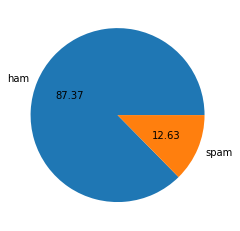

In [ ]:
import matplotlib.pyplot as plt 
plt.pie(data['Target'].value_counts(),labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [ ]:
data

,Target,Text
0,0,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives around here though"
...,...,...
5567,1,"This is the 2nd time we have tried 2 contact u. U have won the å£750 Pound prize. 2 claim is easy, call 087187272008 NOW1! Only 10p per minute. BT-national-rate."
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other suggestions?"
5570,0,The guy did some bitching but I acted like i'd be interested in buying something else next week and he gave it to us for free


In [ ]:
import nltk

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
data['total_character'] = data['Text'].apply(len)

In [ ]:
data

,Target,Text,total_character
0,0,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives around here though",61
...,...,...,...
5567,1,"This is the 2nd time we have tried 2 contact u. U have won the å£750 Pound prize. 2 claim is easy, call 087187272008 NOW1! Only 10p per minute. BT-national-rate.",161
5568,0,Will Ì_ b going to esplanade fr home?,37
5569,0,"Pity, * was in mood for that. So...any other suggestions?",57
5570,0,The guy did some bitching but I acted like i'd be interested in buying something else next week and he gave it to us for free,125


In [ ]:
data['total_num_of_words'] = data['Text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [ ]:
data

,Target,Text,total_character,total_num_of_words
0,0,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives around here though",61,15
...,...,...,...,...
5567,1,"This is the 2nd time we have tried 2 contact u. U have won the å£750 Pound prize. 2 claim is easy, call 087187272008 NOW1! Only 10p per minute. BT-national-rate.",161,35
5568,0,Will Ì_ b going to esplanade fr home?,37,9
5569,0,"Pity, * was in mood for that. So...any other suggestions?",57,15
5570,0,The guy did some bitching but I acted like i'd be interested in buying something else next week and he gave it to us for free,125,27


In [ ]:
data['total_num_of_sentence'] = data['Text'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [ ]:
data

,Target,Text,total_character,total_num_of_words,total_num_of_sentence
0,0,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives around here though",61,15,1
...,...,...,...,...,...
5567,1,"This is the 2nd time we have tried 2 contact u. U have won the å£750 Pound prize. 2 claim is easy, call 087187272008 NOW1! Only 10p per minute. BT-national-rate.",161,35,4
5568,0,Will Ì_ b going to esplanade fr home?,37,9,1
5569,0,"Pity, * was in mood for that. So...any other suggestions?",57,15,2
5570,0,The guy did some bitching but I acted like i'd be interested in buying something else next week and he gave it to us for free,125,27,1


In [ ]:
data.describe()

,Target,total_character,total_num_of_words,total_num_of_sentence
count,5169.000000,5169.000000,5169.000000,5169.000000
mean,0.126330,78.977945,18.453279,1.947185
std,0.332253,58.236293,13.324793,1.362406
min,0.000000,2.000000,1.000000,1.000000
25%,0.000000,36.000000,9.000000,1.000000
50%,0.000000,60.000000,15.000000,1.000000
75%,0.000000,117.000000,26.000000,2.000000
max,1.000000,910.000000,220.000000,28.000000


In [ ]:
data.corr()

,Target,total_character,total_num_of_words,total_num_of_sentence
Target,1.000000,0.384717,0.262984,0.284901
total_character,0.384717,1.000000,0.965770,0.638143
total_num_of_words,0.262984,0.965770,1.000000,0.684541
total_num_of_sentence,0.284901,0.638143,0.684541,1.000000


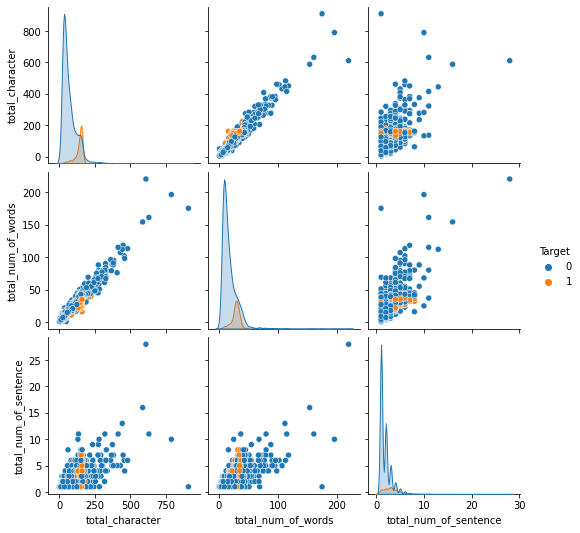

In [ ]:
sns.pairplot(data, hue= 'Target')

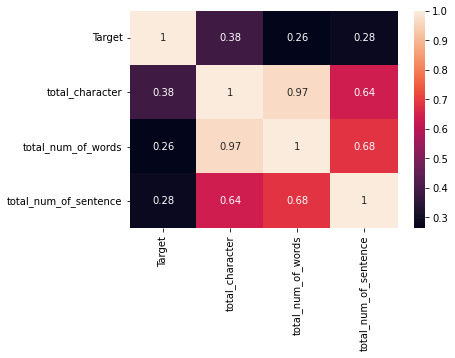

In [ ]:
sns.heatmap(data.corr(),annot = True)

In [ ]:
# now i remove punctuation in a dataset

In [ ]:
import string

In [ ]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
def punctuation_removal(messy_str):
  clean_list=[char for char in messy_str if char not in string.punctuation]
  clean_str = ''. join(clean_list)
  return clean_str
  
data['Text'] = data['Text'].apply(punctuation_removal)

In [ ]:
data

,Target,Text,total_character,total_num_of_words,total_num_of_sentence
0,0,Go until jurong point crazy Available only in bugis n great world la e buffet Cine there got amore wat,111,24,2
1,0,Ok lar Joking wif u oni,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005 Text FA to 87121 to receive entry questionstd txt rateTCs apply 08452810075over18s,155,37,2
3,0,U dun say so early hor U c already then say,49,13,1
4,0,Nah I dont think he goes to usf he lives around here though,61,15,1
...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u U have won the å£750 Pound prize 2 claim is easy call 087187272008 NOW1 Only 10p per minute BTnationalrate,161,35,4
5568,0,Will Ì b going to esplanade fr home,37,9,1
5569,0,Pity was in mood for that Soany other suggestions,57,15,2
5570,0,The guy did some bitching but I acted like id be interested in buying something else next week and he gave it to us for free,125,27,1


In [ ]:
#converting all the text into lower case
data['Text'] = data['Text'].str.lower()

In [ ]:
data

,Target,Text,total_character,total_num_of_words,total_num_of_sentence
0,0,go until jurong point crazy available only in bugis n great world la e buffet cine there got amore wat,111,24,2
1,0,ok lar joking wif u oni,29,8,2
2,1,free entry in 2 a wkly comp to win fa cup final tkts 21st may 2005 text fa to 87121 to receive entry questionstd txt ratetcs apply 08452810075over18s,155,37,2
3,0,u dun say so early hor u c already then say,49,13,1
4,0,nah i dont think he goes to usf he lives around here though,61,15,1
...,...,...,...,...,...
5567,1,this is the 2nd time we have tried 2 contact u u have won the å£750 pound prize 2 claim is easy call 087187272008 now1 only 10p per minute btnationalrate,161,35,4
5568,0,will ì b going to esplanade fr home,37,9,1
5569,0,pity was in mood for that soany other suggestions,57,15,2
5570,0,the guy did some bitching but i acted like id be interested in buying something else next week and he gave it to us for free,125,27,1


In [ ]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [ ]:
spam = wc.generate(data[data['Target'] == 1]['Text'].str.cat(sep=" "))

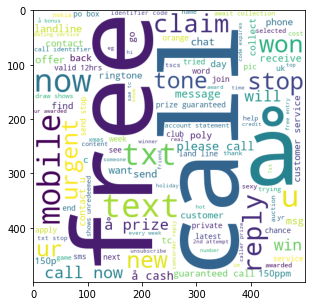

In [ ]:
plt.figure(figsize=(10,5))
plt.imshow(spam)

In [ ]:
not_spam=wc.generate(data[data['Target'] == 0]['Text'].str.cat(sep=" "))


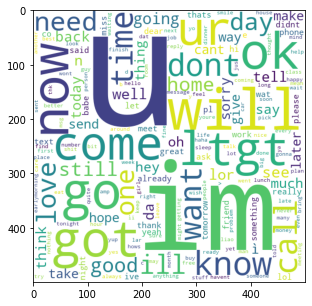

In [ ]:
plt.figure(figsize=(10,5))
plt.imshow(not_spam)

In [ ]:
# here i perform a loop to find most_common words in spam
spam_corpus=[]
for msg in data[data['Target']== 1]['Text'].tolist():
   for word in msg.split():
     spam_corpus.append(word)

In [ ]:
len(spam_corpus)

15265

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


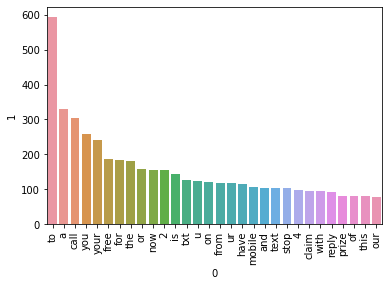

In [ ]:
# Here i import a library Name Counter to get most common words
from collections import Counter
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0],pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation = 'vertical')
plt.show()

In [ ]:
ham_corpus=[]
for msg in data[data['Target']==0]['Text'].tolist():
 for word in msg.split():
    ham_corpus.append(word)
    

In [ ]:
len(ham_corpus)

62935

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


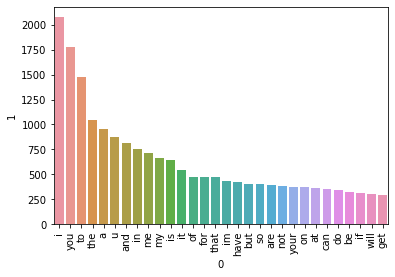

In [ ]:
sns.barplot(pd.DataFrame(Counter(ham_corpus).most_common(30))[0],pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation = 'vertical')
plt.show()

Now i Building a Model

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [ ]:
X = cv.fit_transform(data['Text']).toarray()

In [ ]:
X.shape

(5169, 9489)

In [ ]:
y = data['Target'].values

In [ ]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.25, random_state = 42)

In [ ]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB

In [ ]:
gnb= GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [ ]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test, y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))


0.9025522041763341
[[1003  104]
 [  22  164]]
0.6119402985074627


In [ ]:
mnb.fit(X_train,y_train)
y_pred2= mnb.predict(X_test)
print(accuracy_score(y_test, y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))


0.9783449342614076
[[1094   13]
 [  15  171]]
0.9293478260869565


In [ ]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test, y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))



0.9690641918020109
[[1104    3]
 [  37  149]]
0.9802631578947368


In [ ]:
# now i performing different different ML Algorithms

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lr= LogisticRegression()
lr.fit(X_train,y_train)
y_pred7= lr.predict(X_test)

In [ ]:
print(accuracy_score(y_test, y_pred7))
print(confusion_matrix(y_test,y_pred7))
print(precision_score(y_test,y_pred7))

0.9752513534416086
[[1104    3]
 [  29  157]]
0.98125


In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
model = DecisionTreeClassifier()
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [ ]:
y_pred8 = model.predict(X_test)

In [ ]:
print(accuracy_score(y_test, y_pred8))
print(confusion_matrix(y_test,y_pred8))
print(precision_score(y_test,y_pred8))

0.9489559164733179
[[1080   27]
 [  39  147]]
0.8448275862068966


In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
model2= RandomForestClassifier()

In [ ]:
model2.fit(X_train,y_train)

RandomForestClassifier()

In [ ]:
y_pred9 = model2.predict(X_test)

In [ ]:
print(accuracy_score(y_test, y_pred9))
print(confusion_matrix(y_test,y_pred9))
print(precision_score(y_test,y_pred9))

0.9613302397525135
[[1106    1]
 [  49  137]]
0.9927536231884058


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
model3 = KNeighborsClassifier()

In [ ]:
model3.fit(X_train,y_train)
y_pred10 = model3.predict(X_test)

In [ ]:
print(accuracy_score(y_test, y_pred10))
print(confusion_matrix(y_test,y_pred10))
print(precision_score(y_test,y_pred10))

0.9010054137664346
[[1107    0]
 [ 128   58]]
1.0


In [ ]:
## In this Dataset RandomForestClassifier and KNN performs best and give best accuracy 
# and best precision score